In [ ]:
import shutil
import json
import os
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -rf '/content/DeepFashion'

In [ ]:
# !zip -r ./cropped_imgs.zip /content/drive/MyDrive/cropped/

In [ ]:
# Runtime ~15s
# !unzip '/content/drive/MyDrive/DeepFashion-20220313T051913Z-010.zip' -d '/content/DeepFashion'

In [ ]:
# Runtime ~ 20s
# !unzip '/content/drive/MyDrive/DeepFashion-20220313T155122Z-001.zip' -d '/content/DeepFashion-1'

In [ ]:
# Runtime ~25s
# !unzip '/content/drive/MyDrive/DeepFashion-20220313T155122Z-002.zip' -d '/content/DeepFashion-2'

In [ ]:
# !unzip '/content/drive/MyDrive/img_highres_seg-004.zip' -d '/content/DeepFashion-3'

In [ ]:
# Runtime ~3m
# !unzip '/content/drive/MyDrive/img_highres-003.zip' -d '/content/DeepFashion-4'

In [ ]:
# Runtime ~1m
# !unzip '/content/drive/MyDrive/img_highres-005.zip' -d '/content/DeepFashion-5'

In [ ]:
# Runtime ~7s
!unzip '/content/drive/MyDrive/Category and Attribute Prediction Benchmark-20220426T164754Z-002.zip' -d '/content/DeepFashion'

In [ ]:
# Runtime ~3m
!unzip '/content/drive/MyDrive/img-003.zip' -d '/content/DeepFashion/Category and Attribute Prediction Benchmark'

In [ ]:
!rm -rf '/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/list_category_cloth.txt'
!rm -rf '/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/list_attr_cloth.txt'
!rm -rf '/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/list_attr_img.txt'

In [ ]:
path = '/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_coarse/'
for file in os.listdir(path):
  shutil.move(path+file, "/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/")

In [ ]:
# # Runtime ~10m
# #!/usr/bin/env python
# # --*-- coding: utf-8 --*--
# import numpy as np
# import json
# import matplotlib.pyplot as plt
# import cv2
# from random import shuffle
# import os

# categories_dict ={1: 'upper', 2: 'upper', 3: 'upper', 4: 'upper', 5: 'upper',
#                   6: 'upper', 7: 'upper', 8: 'upper', 9: 'upper', 10: 'upper',
#                   11: 'upper', 12: 'upper', 13: 'upper', 14: 'upper', 15: 'upper',
#                   16: 'upper', 17: 'upper', 18: 'upper', 19: 'upper', 20: 'upper',
#                   21: 'lower', 22: 'lower', 23: 'lower', 24: 'lower', 25: 'lower',
#                   26: 'lower', 27: 'lower', 28: 'lower', 29: 'lower', 30: 'lower',
#                   31: 'lower', 32: 'lower', 33: 'lower', 34: 'lower', 35: 'lower',
#                   36: 'lower',
#                   37: 'full', 38: 'full', 39: 'full', 40: 'full', 41: 'full',
#                   42: 'full', 43: 'full', 44: 'full', 45: 'full', 46: 'full',
#                   47: 'full', 48: 'full', 49: 'full', 50: 'full' }
# categories3_dict = {'upper': 1, 'lower': 2, 'full': 3}


# def to_coco(shuffle_idx, images, bboxs, imagesdir):

#     coco_dict = {}
#     coco_dict[u'images'] = []
#     coco_dict[u'annotations'] = []
#     count = 0
#     for idx in shuffle_idx:
#         print ('---', count, '---', len(shuffle_idx))
#         count += 1
#         assert bboxs[idx].split(' ')[0] == images[idx].split(' ')[0]

#         image_name = images[idx].split(' ')[0]
#         category_id = eval(images[idx].split(' ')[-1])
#         image_file = imagesdir + image_name
#         img = cv2.imread(image_file, 0)
#         height, width = img.shape

#         x1, y1, x2, y2 = map(int, bboxs[idx].split(' ')[-4:])
#         # img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         # plt.imshow(img)
#         # plt.show()

#         ###
#         image_dict = {u'date_captured': u'2019-05-03 14:01:02',
#                       u'file_name': image_name,
#                       u'height': height,
#                       u'id': idx,
#                       u'license': 1,
#                       u'url': image_name,
#                       u'width': width}
#         coco_dict[u'images'].append(image_dict)

#         ###
#         bbox = [x1, y1, x2 - x1, y2 - y1]  # [x,y,width,height]
#         annotation_dict = {u'segmentation': [[312.29, 562.89]],
#                            u'area': (x2 - x1) * (y2 - y1),
#                            u'iscrowd': 0, # 
#                            u'image_id': idx,
#                            u'bbox': bbox,
#                            u'category_id': categories3_dict[categories_dict[category_id]],
#                            u'id': idx}
#         coco_dict[u'annotations'].append(annotation_dict)

#     ###
#     coco_info_dict = {u'contributor': u'DeepFashion',
#                       u'date_created': u'2019-05-03 14:01:02',
#                       u'description': u'COCO Dataset format of DeepFashion.',
#                       u'url': u'',
#                       u'version': u'',
#                       u'year': 2019}
#     coco_type = u'instances'
#     coco_licenses_dict = [{u'id': 1,
#                            u'name': u'Attribution-NonCommercial-ShareAlike License',
#                            u'url': u'http://creativecommons.org/licenses/by-nc-sa/2.0/'}]
#     coco_categories = [{u'id': 1, u'name': u'upper', u'supercategory': u'upper'},
#                        {u'id': 2, u'name': u'lower', u'supercategory': u'lower'},
#                        {u'id': 3, u'name': u'full', u'supercategory': u'full'}]


#     coco_dict[u'info'] = coco_info_dict
#     coco_dict[u'licenses'] = coco_licenses_dict
#     coco_dict[u'categories'] = coco_categories

#     return coco_dict


# if __name__ == '__main__':
#     print ('Convert DeepFashion Data to COCO Format...')

#     deepfashion_root = '/content/DeepFashion/Category and Attribute Prediction Benchmark/'

#     category_annofile = deepfashion_root + 'Anno_fine/list_category_cloth.txt'
#     category_imgfile = deepfashion_root + 'Anno_fine/list_category_img.txt'
#     category_bboxfile = deepfashion_root + 'Anno_fine/list_bbox.txt'

#     categories = open(category_annofile).readlines()[2:]
#     images = open(category_imgfile).readlines()[2:]
#     bboxs = open(category_bboxfile).readlines()[2:]

#     assert len(images) == len(bboxs)
#     print ('Num of Deepfashion Category Images: ', len(images))

#     shuffle_idx = list(range(len(images)))
#     shuffle(shuffle_idx)

#     coco_dict_train = to_coco(shuffle_idx[:200000], images, bboxs, deepfashion_root)
#     coco_dict_val = to_coco(shuffle_idx[200000:], images, bboxs, deepfashion_root)

#     f = open('coco_deepfashion3_train.json', 'w')
#     f.write(json.dumps(coco_dict_train))
#     f.close()

#     f = open('coco_deepfashion3_val.json', 'w')
#     f.write(json.dumps(coco_dict_val))
#     f.close()

#     print('Done.')

In [ ]:
# anno_coarse_list_category_cloth = open('/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_coarse/list_category_cloth.txt').readlines()
# anno_fine_list_category_cloth = open('/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/list_category_cloth.txt').readlines()

# anno_coarse_list_attr_cloth = open('/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_coarse/list_attr_cloth.txt').readlines()
# anno_fine_list_attr_cloth = open('/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/list_attr_cloth.txt').readlines()

# anno_coarse_list_attr_img = open('/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_coarse/list_attr_img.txt').readlines()
# anno_fine_list_attr_img = open('/content/DeepFashion/Category and Attribute Prediction Benchmark/Anno_fine/list_attr_img.txt').readlines()

In [ ]:
# print(anno_coarse_list_category_cloth == anno_fine_list_category_cloth)
# print(anno_coarse_list_attr_cloth == anno_fine_list_attr_cloth)
# print(anno_coarse_list_attr_img == anno_fine_list_attr_img)

In [ ]:
# with open('coco_deepfashion3_train.json') as json_file:
#     data = json.load(json_file)
#     print(len(data))

# count = 0
# for i in data:
#   print(i)
#   count = count+1
#   if count==10:
#     break

In [ ]:
deepfashion_root = '/content/DeepFashion/Category and Attribute Prediction Benchmark/'

category_annofile = deepfashion_root + 'Anno_fine/list_category_cloth.txt'
category_imgfile = deepfashion_root + 'Anno_fine/list_category_img.txt'
category_bboxfile = deepfashion_root + 'Anno_fine/list_bbox.txt'

categories = open(category_annofile).readlines()[2:]
images = open(category_imgfile).readlines()[2:]
bboxs = open(category_bboxfile).readlines()[2:]

print ('Num of Deepfashion Category Images: ', len(images))

for idx in range(len(images)):
  print ('---', idx, '---', len(images))
  image_name = images[idx].split(' ')[0]
  category_id = eval(images[idx].split(' ')[-1])
  image_file = deepfashion_root + image_name

  x1, y1, x2, y2 = map(int, bboxs[idx].split(' ')[-4:])
  
  image = Image.open(image_file)
  cropped = image.crop((x1, y1, x2, y2))
  path = image_name.split('/')[0] + '/' + image_name.split('/')[1] + '/'
  if not (os.path.exists(deepfashion_root + 'cropped/' + path)):
    os.makedirs(deepfashion_root + 'cropped/' + path)
  cropped.save(deepfashion_root + 'cropped/' + image_name[:-4] + '.png', format = 'PNG')

In [ ]:
# !cp /content/DeepFashion/Category\ and\ Attribute\ Prediction\ Benchmark/cropped/ /content/drive/MyDrive
shutil.move("/content/DeepFashion/Category and Attribute Prediction Benchmark/cropped/", "/content/drive/MyDrive")

'/content/drive/MyDrive/cropped'

In [ ]:
categories[1]

In [ ]:
images[1]

In [ ]:
bboxs[1]

In [ ]:
image_name = images[1].split(' ')[0]
print(image_name)
category_id = eval(images[1].split(' ')[-1])
print(category_id)

img/Sheer_Pleated-Front_Blouse/img_00000002.jpg
3


In [ ]:
# categories_dict[category_id]

In [ ]:
# bboxs[1].split(' ')[0] == images[1].split(' ')[0]
# images[1].split(' ')[0]
bboxs[1].split(' ')[0]

'img/Sheer_Pleated-Front_Blouse/img_00000002.jpg'

In [ ]:
bboxs[1].split(' ')[-4:]

['067', '059', '155', '161\n']

In [ ]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seem for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [ ]:
# Root directory for dataset
dataroot = "/content/drive/MyDrive/cropped/"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 200

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

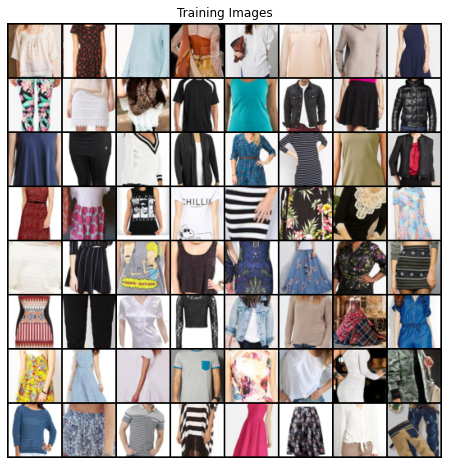

In [ ]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)
      
 
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)
      
      
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [ ]:
from traitlets.traitlets import Float
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1
fake_label = 0

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):
      ############################
      # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
      ###########################
      ## Train with all-real batch
      netD.zero_grad()
      # Format batch
      real_cpu = data[0].to(device)
      b_size = real_cpu.size(0)
      # print("b_size ", b_size)
      label = torch.full((b_size,), real_label, dtype = float, device=device)
      # Forward pass real batch through D
      output = netD(real_cpu).view(-1)
      # print("output ", output.shape)
      # Calculate loss on all-real batch
      print('epoch is', epoch)
      print('i is', i)
      print('iters is', iters)
      # print(type(output))
      # print(type(label))
      errD_real = criterion(output, label.float())
      # Calculate gradients for D in backward pass
      errD_real.backward()
      D_x = output.mean().item()

      ## Train with all-fake batch
      # Generate batch of latent vectors
      noise = torch.randn(b_size, nz, 1, 1, device=device)
      # Generate fake image batch with G
      fake = netG(noise)
      label.fill_(fake_label)
      # Classify all fake batch with D
      output = netD(fake.detach()).view(-1)
      # Calculate D's loss on the all-fake batch
      errD_fake = criterion(output, label.float())
      # Calculate the gradients for this batch
      errD_fake.backward()
      D_G_z1 = output.mean().item()
      # Add the gradients from the all-real and all-fake batches
      errD = errD_real + errD_fake
      # Update D
      optimizerD.step()

      ############################
      # (2) Update G network: maximize log(D(G(z)))
      ###########################
      netG.zero_grad()
      label.fill_(real_label)  # fake labels are real for generator cost
      # Since we just updated D, perform another forward pass of all-fake batch through D
      output = netD(fake).view(-1)
      # Calculate G's loss based on this output
      errG = criterion(output, label.float())
      # Calculate gradients for G
      errG.backward()
      D_G_z2 = output.mean().item()
      # Update G
      optimizerG.step()

      # Output training stats
      if i % 50 == 0:
        print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                % (epoch, num_epochs, i, len(dataloader),
                    errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

      # Save Losses for plotting later
      G_losses.append(errG.item())
      D_losses.append(errD.item())

      # Check how the generator is doing by saving G's output on fixed_noise
      if (iters % 250 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
          with torch.no_grad():
              fake = netG(fixed_noise).detach().cpu()
          img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
          with open('/content/drive/MyDrive/img_list.pkl', 'wb') as f:
            pickle.dump(img_list, f)
          f.close()

      iters += 1

Streaming output truncated to the last 5000 lines.
iters is 922
epoch is 0
i is 923
iters is 923
epoch is 0
i is 924
iters is 924
epoch is 0
i is 925
iters is 925
epoch is 0
i is 926
iters is 926
epoch is 0
i is 927
iters is 927
epoch is 0
i is 928
iters is 928
epoch is 0
i is 929
iters is 929
epoch is 0
i is 930
iters is 930
epoch is 0
i is 931
iters is 931
epoch is 0
i is 932
iters is 932
epoch is 0
i is 933
iters is 933
epoch is 0
i is 934
iters is 934
epoch is 0
i is 935
iters is 935
epoch is 0
i is 936
iters is 936
epoch is 0
i is 937
iters is 937
epoch is 0
i is 938
iters is 938
epoch is 0
i is 939
iters is 939
epoch is 0
i is 940
iters is 940
epoch is 0
i is 941
iters is 941
epoch is 0
i is 942
iters is 942
epoch is 0
i is 943
iters is 943
epoch is 0
i is 944
iters is 944
epoch is 0
i is 945
iters is 945
epoch is 0
i is 946
iters is 946
epoch is 0
i is 947
iters is 947
epoch is 0
i is 948
iters is 948
epoch is 0
i is 949
iters is 949
epoch is 0
i is 950
iters is 950
[0/200][950/

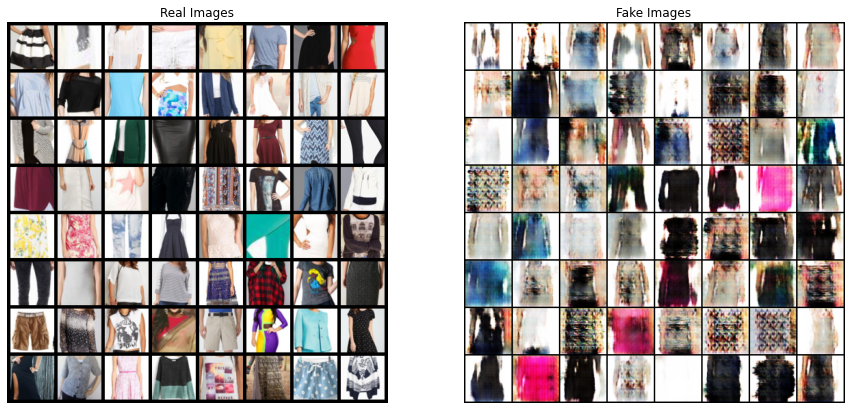

In [ ]:
with open('/content/drive/MyDrive/img_list.pkl', 'rb') as f:
    img_list = pickle.load(f)

# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
for i in range(64):
  fake = netG(fixed_noise).detach().cpu()
  img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

In [ ]:
for i, data in enumerate(dataloader):
  print('i is', i)
  # print('data is', data)
  print('Loop ', i)
  print('Len of data ', len(data))
  print('Len of data[0] ', len(data[0]))
  print('Len of data[1] ', len(data[1]))
  a = data
  # plt.subplot(1,2,2)
  # plt.axis("off")
  # plt.title("Fake Images")
  # plt.imshow(np.float(data))
  # plt.show()
  # if i==0:
  #   break
  break

In [ ]:
print(a[0].shape)

for i, data in enumerate(a):
  print('i is', i)
  # print('data is', data)
  print('Loop ', i)
  print('Len of data ', len(data))
  print('Len of data[0] ', len(data[0]))
  print('Len of data[1] ', len(data[1]))


In [ ]:
# torch.device("cuda:0")
# import tensorflow as tf
# tf.test.gpu_device_name()

!nvidia-smi -L